# Importing and Cleaning Data

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Examining the dataset
oak = pd.read_csv('ca_oakland_2020_04_01.csv')
oak.head()

/Users/ibrahim_saidi/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6,10,22,27) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,raw_row_number,date,time,location,lat,lng,beat,subject_age,subject_race,subject_sex,...,contraband_weapons,search_conducted,search_basis,reason_for_stop,use_of_force_description,raw_subject_sdrace,raw_subject_resultofencounter,raw_subject_searchconducted,raw_subject_typeofsearch,raw_subject_resultofsearch
0,17213,NaN,01:33:00,E. 28th St. & Park BLVD,37.803084,-122.237247,NaN,NaN,asian/pacific islander,female,...,NaN,False,NaN,Traffic Violation,NaN,A,"Citation,",No,NaN,NaN
1,17214,NaN,14:48:00,1759 SEMINARY AV,37.767568,-122.196820,NaN,NaN,black,male,...,False,True,other,Probation/Parole,NaN,B,"FI Report,",Yes,"Prob./Parole,",NaN
2,1,2013-04-01,00:00:00,31st St And Mlk Jr Way,37.820599,-122.270734,NaN,NaN,white,male,...,False,True,other,Traffic Violation,NaN,W,"Warning,",Yes,"Prob./Parole,",NaN
3,2,2013-04-01,00:01:00,3000 Block Of San Pablo Ave,37.821246,-122.276488,NaN,NaN,black,male,...,NaN,False,NaN,Traffic Violation,NaN,B,"FI Report,",No,NaN,NaN
4,19,2013-04-01,10:41:00,12th St/Broadway,37.802937,-122.271738,NaN,NaN,hispanic,female,...,NaN,False,NaN,Probable Cause,NaN,H,"Citation,",No,NaN,NaN


In [4]:
oak.isnull().sum()

raw_row_number                        0
date                                  2
time                                  2
location                             51
lat                                 114
lng                                 114
beat                              72424
subject_age                      102724
subject_race                          0
subject_sex                          90
officer_assignment               121431
type                              20066
arrest_made                           0
citation_issued                       0
warning_issued                        0
outcome                           34107
contraband_found                  92250
contraband_drugs                  92250
contraband_weapons                92250
search_conducted                      0
search_basis                      92250
reason_for_stop                       0
use_of_force_description         116734
raw_subject_sdrace                    0
raw_subject_resultofencounter         0


In [5]:
oak.shape

(133407, 28)

In [6]:
to_drop = ['location', 'lat', 'lng', 'officer_assignment', 'raw_row_number', 
           'contraband_found','raw_subject_searchconducted','raw_subject_resultofsearch', 
           'outcome', 'contraband_drugs','raw_subject_sdrace', 'type', 'beat', 'subject_age', 
           'raw_subject_typeofsearch', 'contraband_weapons','search_basis', 'use_of_force_description'  ]
oak.drop(to_drop, axis='columns', inplace=True)
oak.rename(columns={'raw_subject_resultofencounter':'stop_outcome'}, inplace=True)
oak['subject_race'] = oak['subject_race'].replace({'asian/pacific islander': 'asian'})
#oak['subject_race'] = oak['subject_race'].map({'asian/pacific islander': 'asian'})
oak.head()

,date,time,subject_race,subject_sex,arrest_made,citation_issued,warning_issued,search_conducted,reason_for_stop,stop_outcome
0,NaN,01:33:00,asian,female,False,True,False,False,Traffic Violation,"Citation,"
1,NaN,14:48:00,black,male,False,False,False,True,Probation/Parole,"FI Report,"
2,2013-04-01,00:00:00,white,male,False,False,True,True,Traffic Violation,"Warning,"
3,2013-04-01,00:01:00,black,male,False,False,False,False,Traffic Violation,"FI Report,"
4,2013-04-01,10:41:00,hispanic,female,False,True,False,False,Probable Cause,"Citation,"


In [7]:
# Let's now make sure each column has the correct data type
oak.dtypes

date                object
time                object
subject_race        object
subject_sex         object
arrest_made           bool
citation_issued       bool
warning_issued        bool
search_conducted      bool
reason_for_stop     object
stop_outcome        object
dtype: object

In [8]:
# Notice we have two missing values in date column. Lets forward fill.
oak['date'].head()

0           NaN
1           NaN
2    2013-04-01
3    2013-04-01
4    2013-04-01
Name: date, dtype: object

In [9]:
oak['date'].fillna(method = 'bfill', inplace=True)
oak['date'].head()

0    2013-04-01
1    2013-04-01
2    2013-04-01
3    2013-04-01
4    2013-04-01
Name: date, dtype: object

In [10]:
oak['date'].isnull().sum()

0

In [11]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = oak.date.str.cat(oak.time, sep= ' ')
# Convert 'combined' to datetime format
oak['stop_datetime'] = pd.to_datetime(combined)
oak.dtypes

date                        object
time                        object
subject_race                object
subject_sex                 object
arrest_made                   bool
citation_issued               bool
warning_issued                bool
search_conducted              bool
reason_for_stop             object
stop_outcome                object
stop_datetime       datetime64[ns]
dtype: object

In [12]:

# Set 'stop_datetime' as the index
oak.set_index('stop_datetime', inplace=True)

# Examine the index
print(oak.index)

# Examine the columns
print(oak.columns)

DatetimeIndex(['2013-04-01 01:33:00', '2013-04-01 14:48:00',
               '2013-04-01 00:00:00', '2013-04-01 00:01:00',
               '2013-04-01 10:41:00', '2013-04-01 14:18:00',
               '2013-04-01 00:15:00', '2013-04-01 15:32:00',
               '2013-04-01 15:55:00', '2013-04-01 16:37:00',
               ...
               '2017-12-31 23:38:00', '2017-12-31 23:52:00',
               '2017-12-31 02:38:00', '2017-12-31 03:31:00',
               '2017-12-31 03:34:00', '2017-12-31 04:10:00',
               '2017-12-31 04:15:00', '2017-12-31 04:15:00',
               '2017-12-31 07:00:00', '2017-12-31 09:39:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=133407, freq=None)
Index(['date', 'time', 'subject_race', 'subject_sex', 'arrest_made',
       'citation_issued', 'warning_issued', 'search_conducted',
       'reason_for_stop', 'stop_outcome'],
      dtype='object')


In [13]:
# Renaming column & removing original date and time column to finale cleaning data
oak.drop(['date', 'time'], axis= 'columns', inplace= True)
oak.head()

,subject_race,subject_sex,arrest_made,citation_issued,warning_issued,search_conducted,reason_for_stop,stop_outcome
stop_datetime,,,,,,,,
2013-04-01 01:33:00,asian,female,False,True,False,False,Traffic Violation,"Citation,"
2013-04-01 14:48:00,black,male,False,False,False,True,Probation/Parole,"FI Report,"
2013-04-01 00:00:00,white,male,False,False,True,True,Traffic Violation,"Warning,"
2013-04-01 00:01:00,black,male,False,False,False,False,Traffic Violation,"FI Report,"
2013-04-01 10:41:00,hispanic,female,False,True,False,False,Probable Cause,"Citation,"


# Data Analysis

In [14]:
print('Rate of searches:', oak.search_conducted.mean())
oak.groupby('subject_race').search_conducted.mean()

Rate of searches: 0.30850704985495514


subject_race
asian       0.161008
black       0.380424
hispanic    0.256008
other       0.156959
white       0.153571
Name: search_conducted, dtype: float64

In [15]:
print('Rate of arrests:', oak.arrest_made.mean())
oak.groupby('subject_race').arrest_made.mean()

Rate of arrests: 0.12135794973277264


subject_race
asian       0.075688
black       0.144973
hispanic    0.099402
other       0.071365
white       0.077041
Name: arrest_made, dtype: float64

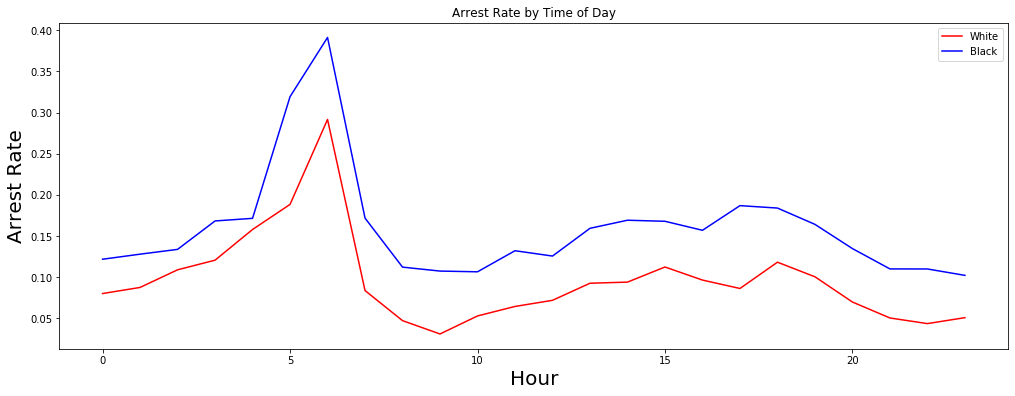

In [20]:
white = oak[oak.subject_race == 'white']
black = oak[oak.subject_race == 'black']

# Save the hourly arrest rate
white_arrest_rate = white.groupby(white.index.hour).arrest_made.mean()
black_arrest_rate = black.groupby(black.index.hour).arrest_made.mean()

fig, ax = plt.subplots(figsize=(17,6))
sns.lineplot(data= white_arrest_rate,
             color='r',
             ax=ax)
sns.lineplot(data= black_arrest_rate, 
             color='b',
             ax=ax)  
ax.legend(['White', 'Black'], facecolor='w')
plt.xlabel('Hour', size=20)
plt.ylabel('Arrest Rate', size=20)
plt.title('Arrest Rate by Time of Day')
plt.show()

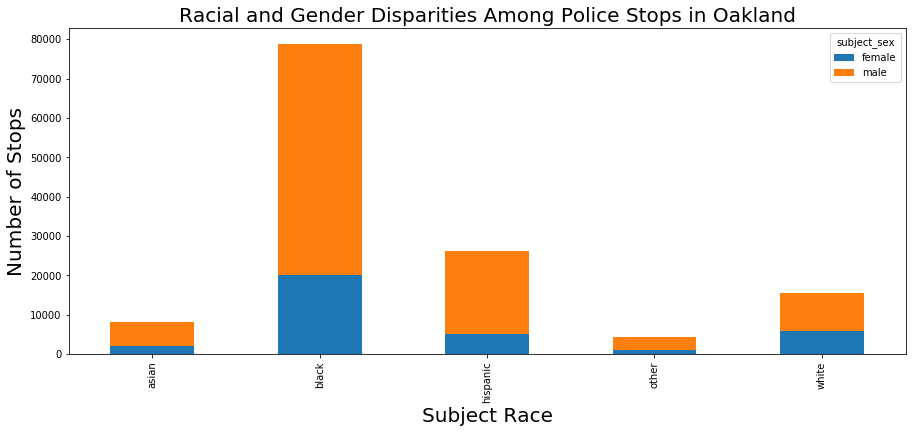

In [25]:
table = pd.crosstab( oak.subject_race, oak.subject_sex)
table.sort_values(by = 'subject_race').plot(kind='bar', stacked= True, figsize=(15,6))
plt.xlabel('Subject Race', size=20)
plt.ylabel('Number of Stops', size=20)
plt.title('Racial and Gender Disparities Among Police Stops in Oakland', size=20)
plt.show()